<a href="https://colab.research.google.com/github/SAndrade100/prob_atv_1/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise de Dados

## Apresentação
O dataset utilizado contém informações sobre a saúde mental de estudantes universitários. Ele inclui dados como gênero, idade, curso, ano de estudo, CGPA, estado civil e se o estudante apresenta sintomas de depressão, ansiedade ou ataques de pânico.

In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Classificação dos Dados
- **Variáveis Categóricas**: `Choose your gender`, `What is your course?`, `Marital status`, `Do you have Depression?`, `Do you have Anxiety?`, `Do you have Panic attack?`
- **Variáveis Numéricas**: `Age`, `What is your CGPA?`, `Your current year of Study`

In [24]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/studentMentalHealth.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Tabelas de Frequência
- **Frequência de Gênero**: A primeira tabela abaixo mostra a distribuição de gênero no dataset, uma das variáveis categóricas.
- **Frequência de Idade**: A segunda tabela abaixo mostra a distribuição de idade no dataset, uma das variáveis numéricas.

In [25]:
df['Choose your gender'].value_counts()

,count
Choose your gender,
Female,75
Male,26


In [26]:
df['Age'].value_counts()

,count
Age,
18.0,32
24.0,23
19.0,21
23.0,13
20.0,6
21.0,3
22.0,2


## Gráficos
- **Distribuição de Gênero**: O gráfico abaixo mostra a distribuição de gênero entre os estudantes do dataset.

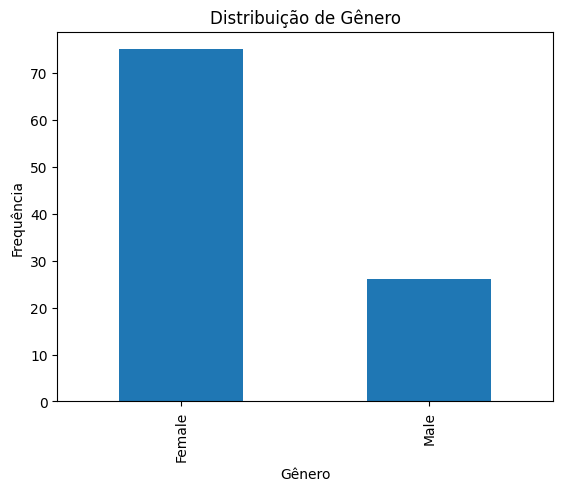

In [27]:
df['Choose your gender'].value_counts().plot(kind='bar')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

### Associando CGPA com presença de distúrbios psicológicos

- **Conversão para binários**: Primeiro é necessário converter os dados categóricos em dados numéricos.

In [28]:
df['Do you have Depression?'] = df['Do you have Depression?'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Do you have Anxiety?'] = df['Do you have Anxiety?'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Do you have Panic attack?'] = df['Do you have Panic attack?'].apply(lambda x: 1 if x == 'Yes' else 0)

df[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].head()

,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,1,0,1
1,0,1,0
2,1,1,1
3,1,0,0
4,0,0,0


- **Distribuição de Gênero**: O gráfico abaixo mostra a distribuição de gênero entre os estudantes do dataset.

- **Estatísticas**: Logo abaixo algumas estatísticas definidas com base nos resultados.

In [29]:
depressao_stats = df.groupby('Do you have Depression?')['What is your CGPA?'].describe()
ansiedade_stats = df.groupby('Do you have Anxiety?')['What is your CGPA?'].describe()
panico_stats = df.groupby('Do you have Panic attack?')['What is your CGPA?'].describe()

print("Estatísticas para Depressão:")
print(depressao_stats)

print("\nEstatísticas para Ansiedade:")
print(ansiedade_stats)

print("\nEstatísticas para Ataques de Pânico:")
print(panico_stats)


Estatísticas para Depressão:
                        count unique          top freq
Do you have Depression?                               
0                          66      5  3.50 - 4.00   35
1                          35      4  3.00 - 3.49   19

Estatísticas para Ansiedade:
                     count unique          top freq
Do you have Anxiety?                               
0                       67      6  3.50 - 4.00   29
1                       34      3  3.50 - 4.00   18

Estatísticas para Ataques de Pânico:
                          count unique          top freq
Do you have Panic attack?                               
0                            68      5  3.00 - 3.49   34
1                            33      6  3.50 - 4.00   18


## Outras Tabelas


In [30]:
# Tabela de distribuição de anos escolares
year_distribution = df['Your current year of Study'].value_counts().sort_index()

# Exibir a tabela
print(year_distribution)


Your current year of Study
Year 1     2
Year 2    16
Year 3    19
year 1    41
year 2    10
year 3     5
year 4     8
Name: count, dtype: int64


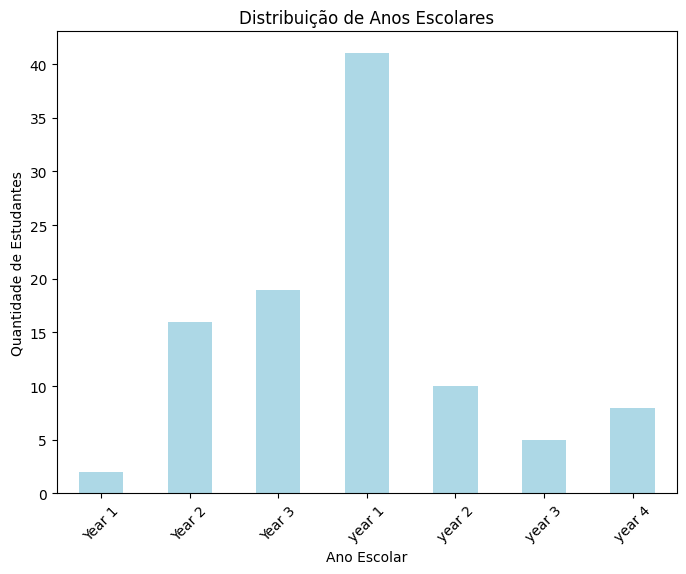

In [31]:
# Gráfico de barras para a distribuição de anos escolares
plt.figure(figsize=(8, 6))
year_distribution.plot(kind='bar', color='lightblue')
plt.title('Distribuição de Anos Escolares')
plt.xlabel('Ano Escolar')
plt.ylabel('Quantidade de Estudantes')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Tabela de distribuição de cursos
course_distribution = df['What is your course?'].value_counts()

# Exibir a tabela
print(course_distribution)


What is your course?
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam   

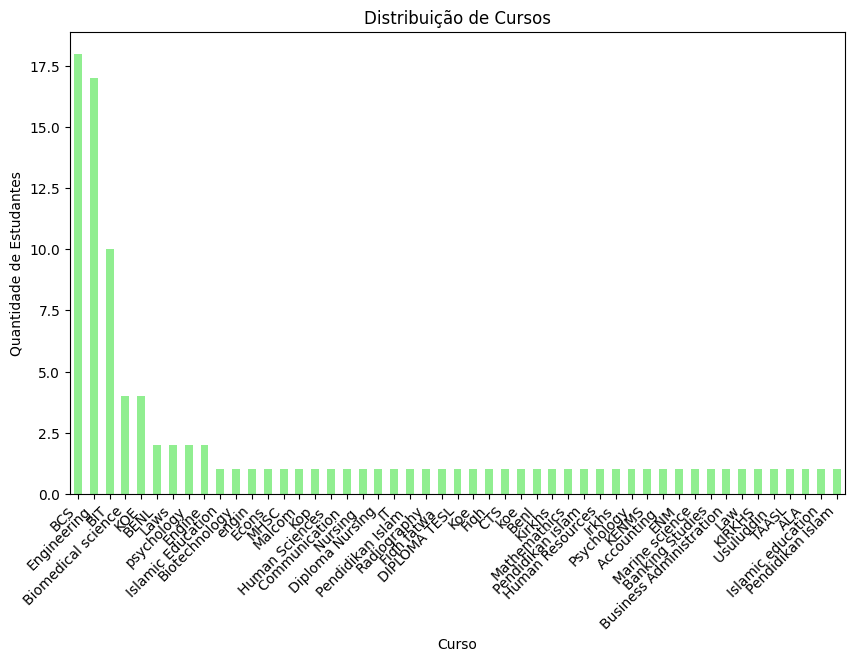

In [33]:
# Gráfico de barras para a distribuição de cursos
plt.figure(figsize=(10, 6))
course_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de Cursos')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Estudantes')
plt.xticks(rotation=45, ha='right')  # Ajuste da rotação dos rótulos no eixo x
plt.show()

## Histogramas

### Distribuição de Idade por Estado Civil

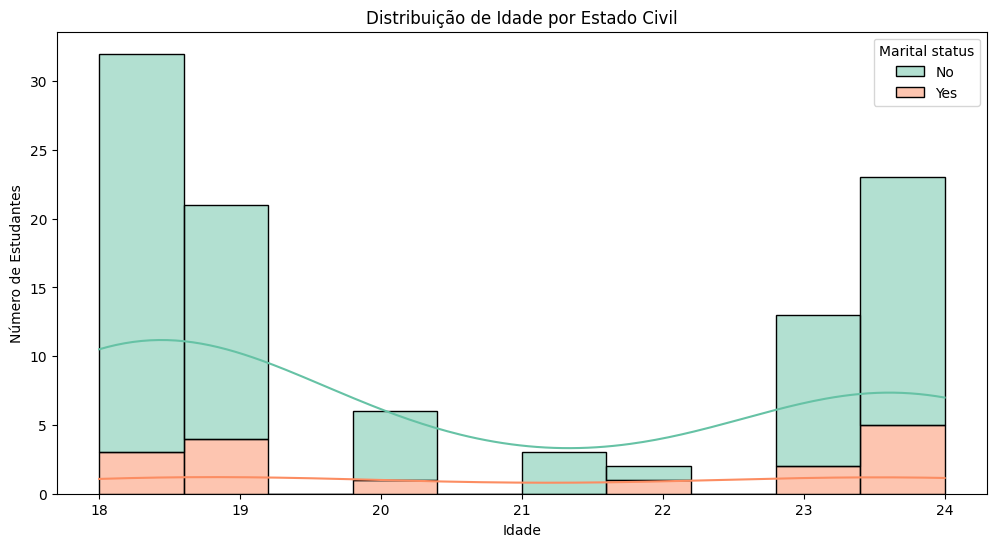

In [34]:
plt.figure(figsize=(12, 6))

# Histogramas para Idade, separados por Estado Civil
sns.histplot(data=df, x='Age', hue='Marital status', multiple='stack', kde=True, bins=10, palette="Set2")

# Título e rótulos
plt.title('Distribuição de Idade por Estado Civil')
plt.xlabel('Idade')
plt.ylabel('Número de Estudantes')

# Exibir o gráfico
plt.show()

### Distribuição de CGPA por Ano de Estudo

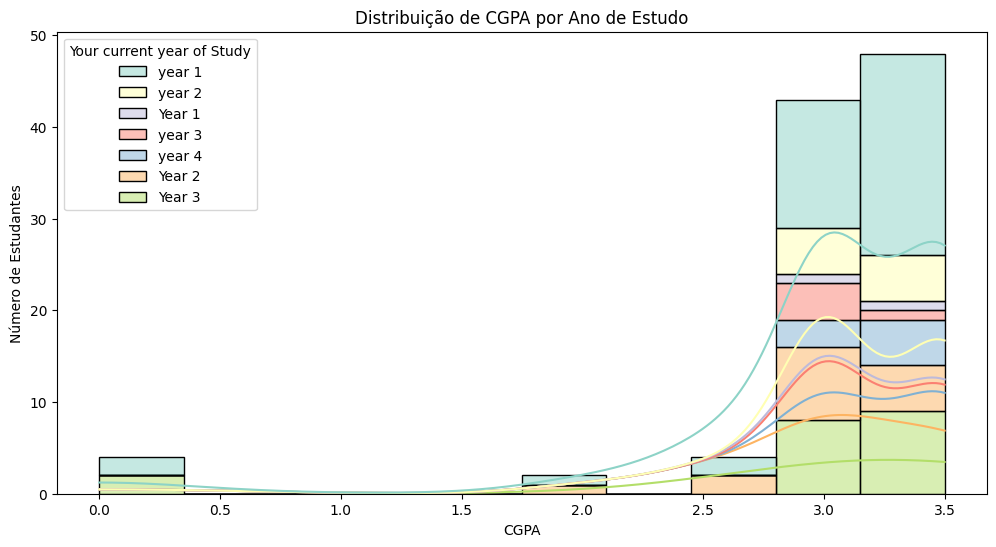

In [35]:
# Caso a coluna 'CGPA Numeric' não exista, você pode criar uma coluna com valores numéricos, por exemplo:
df['CGPA Numeric'] = df['What is your CGPA?'].apply(lambda x: float(x.split(' - ')[0]))  # Pega o valor inicial da faixa de CGPA

# Agora, tente novamente o histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='CGPA Numeric', hue='Your current year of Study', multiple='stack', kde=True, bins=10, palette="Set3")
plt.title('Distribuição de CGPA por Ano de Estudo')
plt.xlabel('CGPA')
plt.ylabel('Número de Estudantes')
plt.show()